In [6]:
!pwd
!ls ./data/202508261937


/d/GH/GitWorkSpace/bank_model_competiton
202508261937_gh_v1.csv
202508261937_gh_v2.csv
model_stacking_v5.ipynb
process_v5.ipynb
test.dat.202508261937
train.dat.202508261937


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'a':['a', 'b', 'c'], 'b':['3','4','5']} )
print(pd.get_dummies(df))


   a_a  a_b  a_c  b_3  b_4  b_5
0    1    0    0    1    0    0
1    0    1    0    0    1    0
2    0    0    1    0    0    1


In [14]:
df = pd.read_csv('./data/202508261937/202508261937_gh_v1.csv')
df[['label']].describe()

,label
count,20054.000000
mean,0.304028
std,0.266113
min,0.000000
25%,0.068901
50%,0.191038
75%,0.531130
max,1.000000


In [15]:
df = pd.read_csv('./data/202508261937/202508261937_gh_v2.csv')
df[['label']].describe()

,label
count,20054.000000
mean,0.209139
std,0.117666
min,0.000000
25%,0.143666
50%,0.199733
75%,0.234548
max,1.000000


In [23]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np


X = np.array([["A1"], ["B2"], ["A2"], ["E2"]])
encoder = OrdinalEncoder(categories=[['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5',]]) 


X_encoded = encoder.fit_transform(X)
print("序数编码结果:\n", X_encoded)

# 解码回原始类别
decoded_labels = encoder.inverse_transform(X_encoded)
print("解码后的类别:\n", decoded_labels)

序数编码结果:
 [[ 0.]
 [ 6.]
 [ 1.]
 [21.]]
解码后的类别:
 [['A1']
 ['B2']
 ['A2']
 ['E2']]


In [34]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# 创建示例数据
data = {'level': ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5']}
df = pd.DataFrame(data)

# 初始化OrdinalEncoder
# enc = OrdinalEncoder()
# enc.fit(df)
enc = OrdinalEncoder(categories=[['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5',]]) 


# 对有序分类变量进行编码
df_encoded = enc.fit_transform(df[['level']])
df_encoded

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.]])

In [68]:
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 100) 
arr = [(i,i)for i in  range(0,1000)]
target = [i for i in  range(0,1000)]


X_train, X_test, y_train, y_test = train_test_split(arr , target ,random_state = 10)
pd.DataFrame([X_train, y_train]).T
# X_train
# y_train
# help(train_test_split)

,0,1
0,"(163, 163)",163
1,"(642, 642)",642
2,"(638, 638)",638
3,"(264, 264)",264
4,"(536, 536)",536
...,...,...
745,"(320, 320)",320
746,"(527, 527)",527
747,"(996, 996)",996
748,"(125, 125)",125


<AxesSubplot:xlabel='label'>

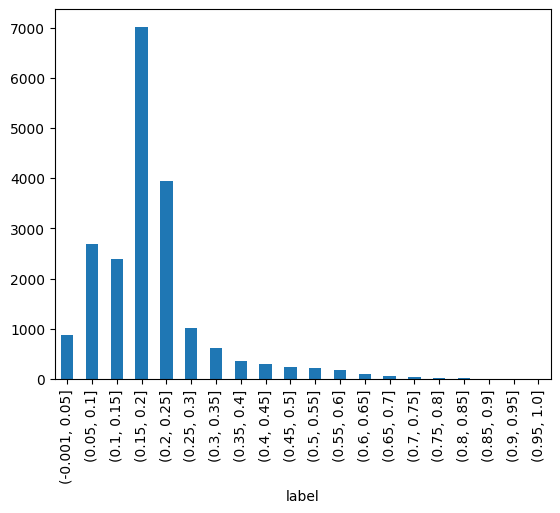

In [39]:
df_pred = pd.read_csv('./0828_gbdt_v3.csv')
df_ret = df_pred.groupby(pd.cut(df_pred['label'], bins=20))['label'].agg('count')
df_ret.plot(kind='bar')